In [1]:
from rdkit import Chem
from rdkit.Chem import SDMolSupplier, rdFMCS, Draw, AllChem, rdMolAlign
import nglview as ngl

# Maximum common substructure search

### Loading clustered molecules

In [2]:
filepath = "../data/molecules/androgen.sdf"
molecules = []

with SDMolSupplier(filepath) as stream_in:
    
    for molecule in stream_in:
        molecules.append(molecule)
    

### Looking for maximum common substructure

In [3]:
result = rdFMCS.FindMCS(molecules)
mcs_smarts = result.smartsString
print(mcs_smarts)


[#6]-[#6]1(-[#6])-[#6]-[#7]-[#6](-[#6]-1-[#8]-[#6]1:[#6]:[#6]:[#6](:[#6](:[#6]:1)-[#6](-[#9])(-[#9])-[#9])-[#6]#[#7])=[#8]


### Highlighting MCS

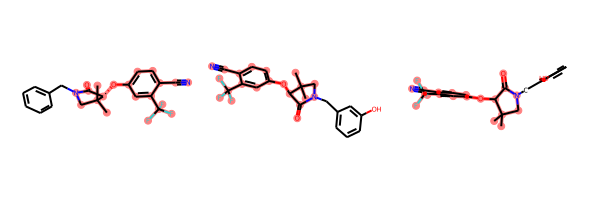

In [4]:
molecules = [(Chem.AddHs(molecule)) for molecule in molecules]
[AllChem.EmbedMolecule(molecule) for molecule in molecules]
molecules = [Chem.RemoveHs(molecule) for molecule in molecules]

query_fragment = Chem.MolFromSmarts(mcs_smarts)
atoms_set = [molecule.GetSubstructMatch(query_fragment) for molecule in molecules]
Draw.MolsToGridImage(molecules[3:6], highlightAtomLists=atoms_set[3:6])

# Molecule alignment

In [5]:
refMol = molecules[0]
refMolMatch = refMol.GetSubstructMatch(query_fragment)

for molecule in molecules[1:]:
    prbMolMatch = molecule.GetSubstructMatch(query_fragment)
    rdMolAlign.AlignMol(molecule, refMol, atomMap =list(zip(prbMolMatch, refMolMatch)))

In [11]:
view = ngl.NGLWidget()

for molecule in molecules[:10]:
    view.add_structure(ngl.RdkitStructure(molecule))

view


NGLWidget()